# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify different types of weather using any open-source pre-trained models.

## Learning Objectives

At the end of this, you will be able to :

* Load and prepare the dataset
* Strengthen skills in the Transfer Learning area

In [1]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/B18_U4_MH_Walkthrough.mp4" type="video/mp4">
</video>
""")

## Dataset

Multi-class weather dataset(MWD) for image classification is a valuable dataset contains 1125 images divided into four folders such as sunrise, shine, rain, and cloudy.

## Grading = 10 Marks

## Setup Steps

In [2]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="U4_MH1_Multi-class weather_Transfer_learning" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Multi-classWeatherDataset.zip")
   ipython.magic("sx unzip -qq Multi-classWeatherDataset.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [3]:
# Import Libraries
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchsummary import summary
from torchvision import datasets, transforms, models

## **Stage 1 :** Data Preparation

2 Marks -> Load the data and Split the data into Train and Test sets

1. Define the transformations
2. Prepare the dataset with the defined transformations
3. Split the data into train and test sets
4. Load the train and test data using dataloader

In [4]:
weights = models.VGG16_Weights.IMAGENET1K_V1 # Best avilable weights
auto_transforms= weights.transforms()
print(auto_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [5]:
import torch, torchvision
from torchvision import datasets, transforms, models

In [6]:
# YOUR CODE HERE for preparing and loading the data

# 1. Define Transformations
normalize=transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229,0.224, 0.225])
manual_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),normalize]) # transforms.InterpolationMode.BILINEAR,

In [7]:
# 2. Prepared the dataset with the defined transformations

import os
data_dir = 'Multi-class Weather Dataset'
image_datasets = datasets.ImageFolder(os.path.join(data_dir),
                                          manual_transform)

class_names = image_datasets.classes

In [8]:
image_datasets[0]

(tensor([[[ 0.0569,  0.1254,  0.1768,  ...,  0.6049,  0.4851,  0.3652],
          [ 0.0741,  0.1254,  0.1768,  ...,  0.5193,  0.3652,  0.2624],
          [ 0.0912,  0.1426,  0.1939,  ...,  0.3823,  0.2282,  0.1426],
          ...,
          [-1.7069, -1.7069, -1.7069,  ..., -1.1760, -1.1589, -1.1760],
          [-1.7240, -1.7240, -1.7240,  ..., -1.1932, -1.1760, -1.1760],
          [-1.7412, -1.7412, -1.7412,  ..., -1.2103, -1.1932, -1.1932]],
 
         [[ 0.1877,  0.2577,  0.3102,  ...,  0.7479,  0.6254,  0.5028],
          [ 0.2052,  0.2577,  0.3102,  ...,  0.6604,  0.5028,  0.3978],
          [ 0.2227,  0.2752,  0.3277,  ...,  0.5203,  0.3627,  0.2752],
          ...,
          [-1.6155, -1.6155, -1.6155,  ..., -1.0728, -1.0553, -1.0728],
          [-1.6331, -1.6331, -1.6331,  ..., -1.0903, -1.0728, -1.0728],
          [-1.6506, -1.6506, -1.6506,  ..., -1.1078, -1.0903, -1.0903]],
 
         [[ 0.4091,  0.4788,  0.5311,  ...,  0.9668,  0.8448,  0.7228],
          [ 0.4265,  0.4788,

In [9]:
class_names

['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [10]:
# class_to_idx gives the dictionary mapping of the classname to the index (label)
label_name = image_datasets.class_to_idx
print(label_name)

# To get class names  trainset.classes
class_name = image_datasets.classes
print(class_name)

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}
['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [11]:
# 3. split the dataset into train and test

In [12]:
image_datasets

Dataset ImageFolder
    Number of datapoints: 1125
    Root location: Multi-class Weather Dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [13]:
# 900 train 225 test
train_set, test_set = torch.utils.data.random_split(image_datasets, [900, 225])

In [14]:
len(train_set),len(test_set)

(900, 225)

In [15]:
# 4. Load train and test data using DataLoader

In [16]:
# Load the data. utils.dataloader. Itis a package for loading the dataset
train_loader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set, shuffle=False, batch_size=100)

In [17]:
for batch in iter(train_loader):
  print(batch[0].shape, batch[1].shape)

torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])


1 Marks -> Plot the first 10 images

In [18]:
# YOUR CODE HERE for plotting the images
# Get the images and the labels
current_Images, current_labels = next(iter(train_loader))

In [19]:
len(current_Images),len(current_labels)

(100, 100)

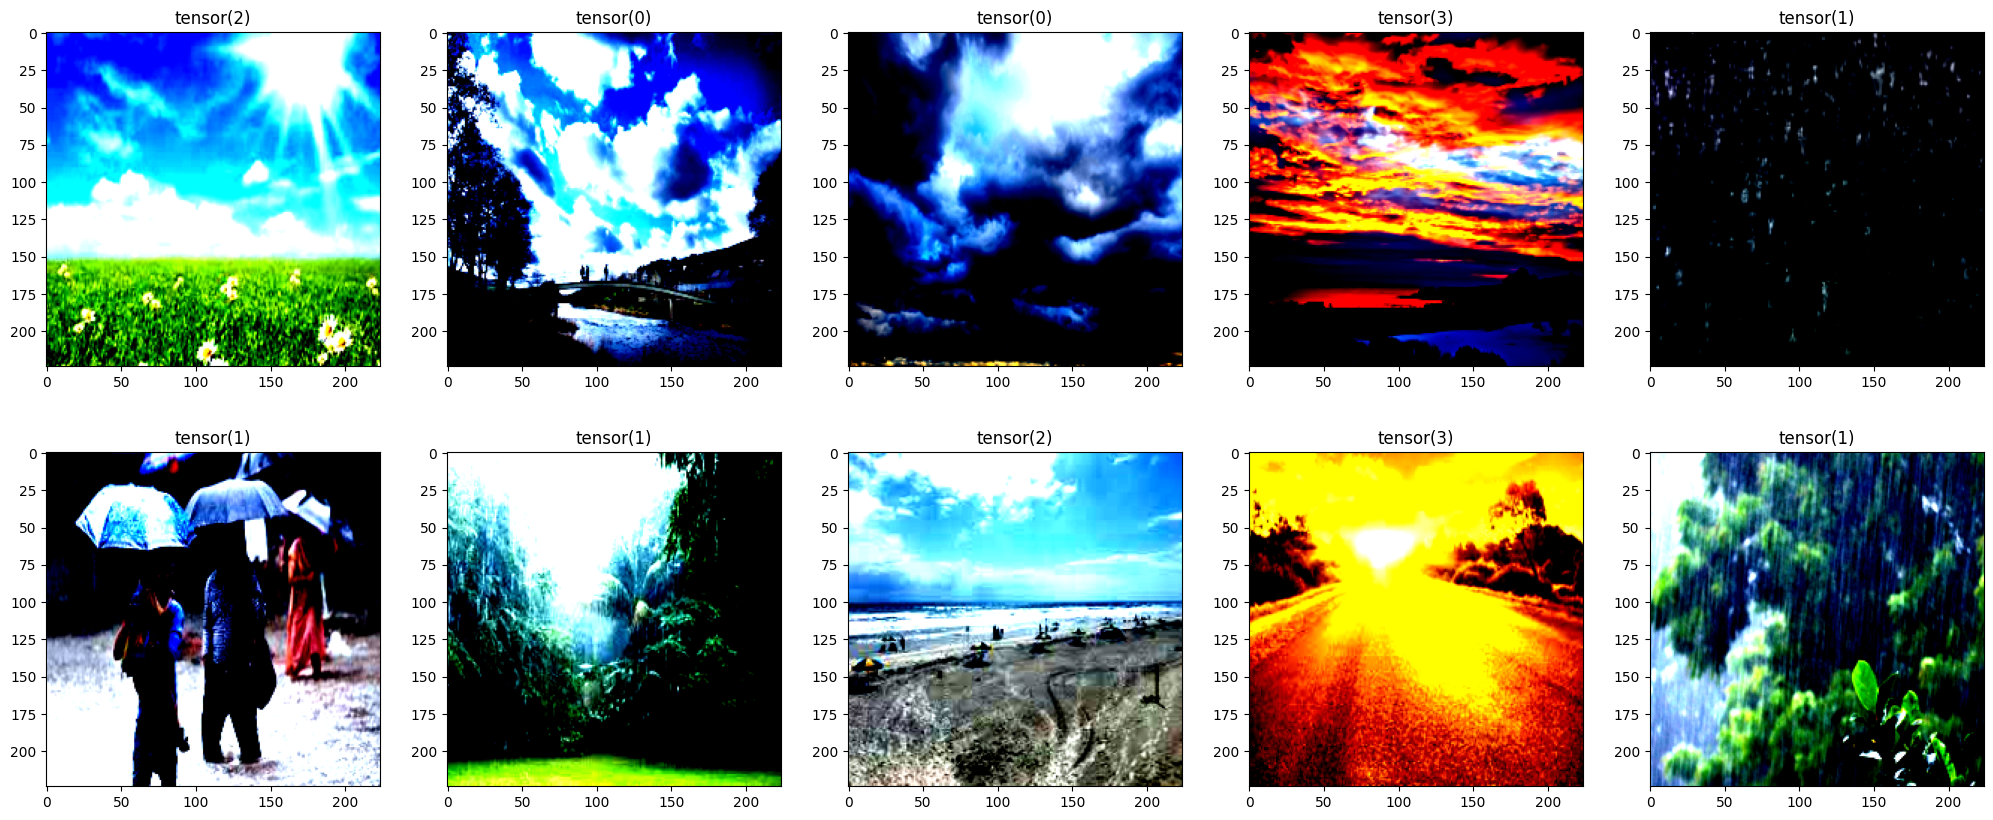

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(25, 10))
count = 0
for i in range(1,11):
  ax = fig.add_subplot(2,5,i)
  ax.imshow(current_Images[i].permute(1,2,0))
  ax.set_title(current_labels[i])

## **Stage2:** Build the Model

2 Marks -> Prepare the Model using any open-source pretrained model

1. Download a pre-trained model.
2. Fine tune or customize layers in the output to perform classification on a specific task.
3. Declare the loss function and optimizer
4. Print the summary of the model.

In [21]:
# YOUR CODE HERE for preparing the model.
# 1. Download a pre-trained model AlexNet
weights = models.VGG16_Weights.IMAGENET1K_V1 # Best avilable weights
auto_transforms= weights.transforms()
print(auto_transforms)
# Load the pretrained model
model_vgg16 = models.vgg16(weights=weights)
print(model_vgg16)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 284MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [22]:
!pip install torchinfo

In [23]:
from torchinfo import summary

In [24]:
summary(model_vgg16, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [25]:
model_vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [26]:
# Freezing all weights
for param in model_vgg16.parameters():
    param.requires_grad = False


In [27]:
import torch
from torch import nn
# Change last 2 layers
# model_vgg16.classifier[3] = nn.Linear(4096, 1048)

model_vgg16.classifier[6] = nn.Linear(4096, 4)
model_vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [29]:
model_vgg16.to(device)
summary(model_vgg16, (1,3, 224,224)) # Last layer parameters not frozen

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 4]                    --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]    

In [30]:
# 3. Declare the loss function and optimizer
from torch import optim

criterion = nn.CrossEntropyLoss()

# {'params': model_vgg16.classifier[3].parameters()},
optimizer = optim.Adam([

      {'params': model_vgg16.classifier[6].parameters(), 'lr': 1e-2}
    ], lr=1e-2)

# Uncomment this to train all parameters
#optimizer = optim.Adam(model_alexnet.parameters(), lr=  1e-4)

In [31]:
# 4. Print the summary of the model.
from torchsummary import summary
summary(model_vgg16, (3, 224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## **Stage 3:** Train the Model

2 Marks -> Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

**Expected training accuracy is above 95%**

In [32]:
# YOUR CODE HERE

# Record loss and accuracy of the train dataset
# No of Epochs
epoch = 5

# Keeping the network in train mode
model_vgg16.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Passing the data to the model (Forward Pass)
      outputs = model_vgg16(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1) #_, => stores all the index of the maximum output
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(train_set))
    train_accuracy.append(100 * correct/len(train_set))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.007674 Train Accuracy: 76.33 
epoch: 2, Train Loss:0.002401 Train Accuracy: 93.56 
epoch: 3, Train Loss:0.001610 Train Accuracy: 95.56 
epoch: 4, Train Loss:0.001288 Train Accuracy: 96.22 
epoch: 5, Train Loss:0.001235 Train Accuracy: 96.67 


## **Stage 4:** Evaluate the Model

2 Marks -> Evaluate the model for the test dataset and calculate the loss and accuracy.

**Expected performance of test evaluation is above 95%**

In [33]:
# model.eval()
# YOUR CODE HERE for calculating the accuracy
model_vgg16.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [34]:
# Keeping the network in evaluation mode
model_vgg16.eval()

Test_accuracy = 0
predictions, test_images = [], []
# Iterate through all the batches in each epoch
for images,labels in test_loader:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass
    outputs = model_vgg16(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()
    test_images.extend(images.cpu())
    predictions.extend(predicted.cpu())

Accuracy = Test_accuracy / len(test_set)
print("Accuracy of Test Data is", Accuracy)

Accuracy of Test Data is 0.9733333333333334


In [35]:
len(test_images)

225

In [36]:
label_name

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}

In [37]:

def get_key(val):

    for key, value in label_name.items():
        if val == value:
            return key

    return "key doesn't exist"


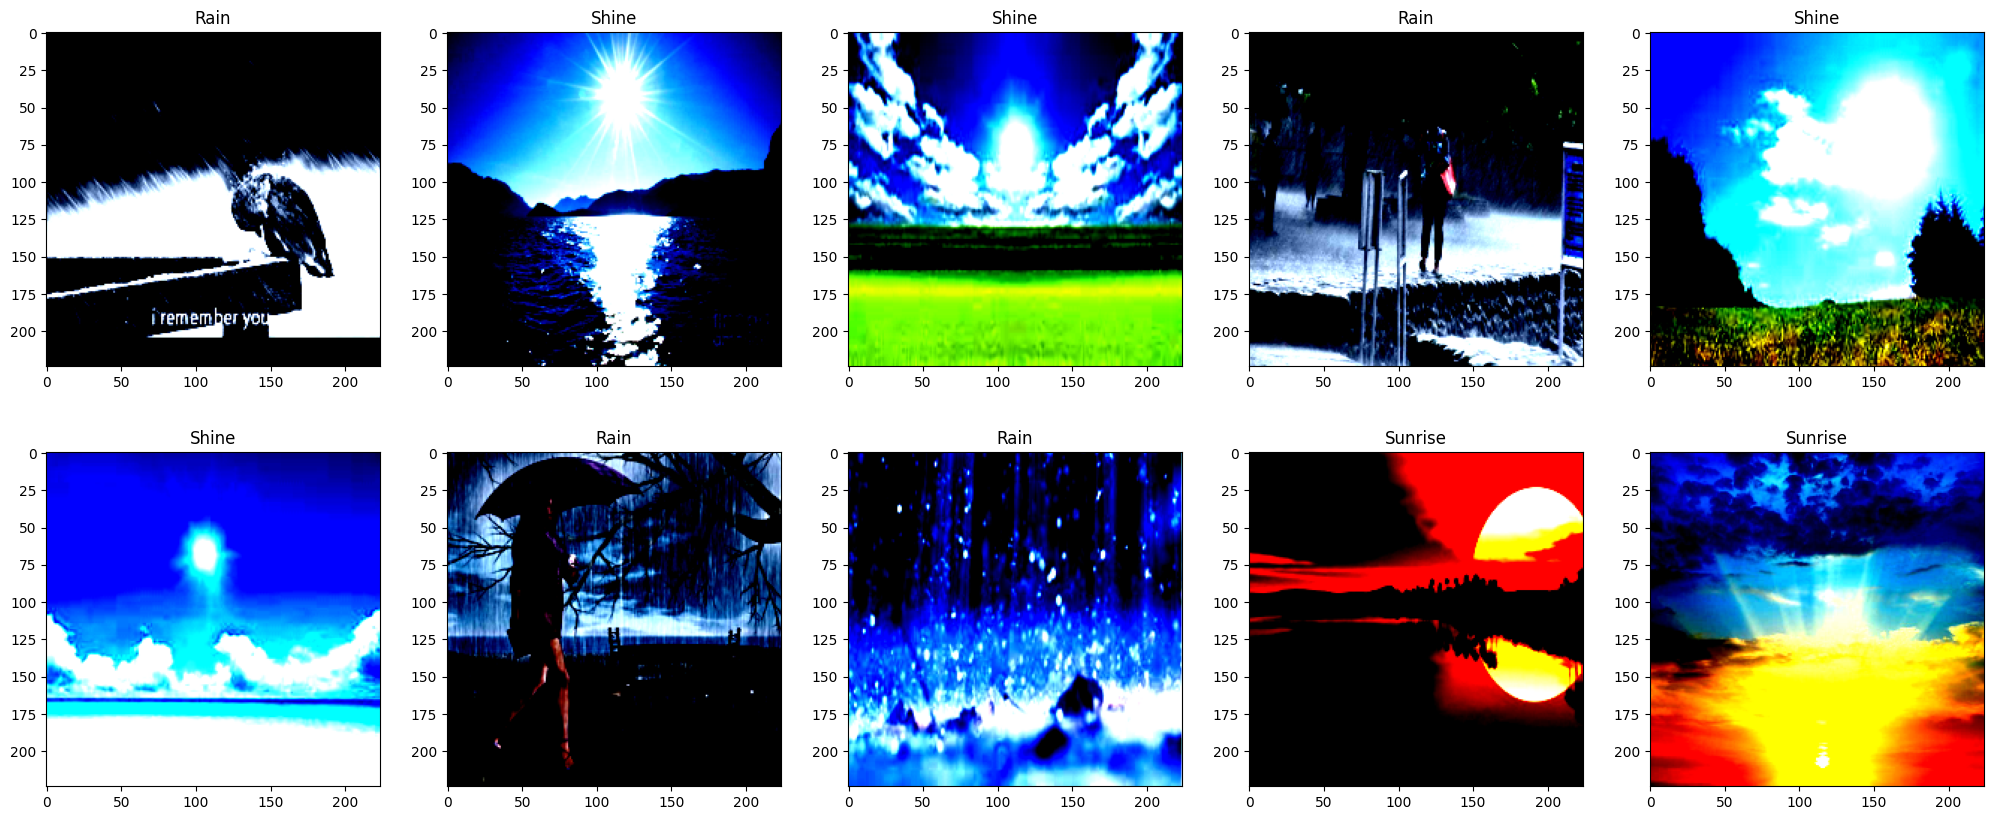

In [38]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(25, 10))
count = 0
for i in range(1,11):
  ax = fig.add_subplot(2,5,i)
  ax.imshow(test_images[i].permute(1, 2, 0))
  ax.set_title(get_key(predictions[i].item()))

## **Stage 5:** Report your observations on any two open source pre-trained models

1 Marks -> Report your observations

In [39]:
# YOUR TEXT HERE on your observations